In [2]:
import numpy as np
import plotly.express as px
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
df_AAPL = pd.read_csv('/content/sample_data/AAPL.csv', index_col='Date', parse_dates=['Date'])
df_AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-01-02,0.154018,0.155134,0.154018,0.154018,0.119666,21660800
1981-01-05,0.151228,0.151228,0.150670,0.150670,0.117065,35728000
1981-01-06,0.144531,0.144531,0.143973,0.143973,0.111862,45158400
1981-01-07,0.138393,0.138393,0.137835,0.137835,0.107093,55686400
1981-01-08,0.135603,0.135603,0.135045,0.135045,0.104925,39827200


In [5]:
set_entrenamiento = df_AAPL[:'2022'].iloc[:,1:2]
set_validacion = df_AAPL['2023':].iloc[:,1:2]
sc = MinMaxScaler(feature_range=(0,1))
set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)

In [12]:
time_step = 50
X_train = []
Y_train = []
m = len(set_entrenamiento_escalado)

for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0])
  
    # Y: el siguiente dato
    Y_train.append(set_entrenamiento_escalado[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

10590


In [ ]:
dim_entrada = (X_train.shape[1],1)
dim_salida = 1
na = 75
modelo = Sequential()
modelo.add(LSTM(units=na, input_shape=dim_entrada))
modelo.add(Dense(units=dim_salida))
modelo.compile(optimizer='rmsprop', loss='mse')
modelo.fit(X_train,Y_train,epochs=20,batch_size=32)

Epoch 1/20
330/330 [==============================] - 10s 24ms/step - loss: 0.0021
Epoch 2/20
330/330 [==============================] - 7s 23ms/step - loss: 4.7719e-04
Epoch 3/20
330/330 [==============================] - 8s 24ms/step - loss: 3.4448e-04
Epoch 4/20
330/330 [==============================] - 9s 28ms/step - loss: 2.6320e-04
Epoch 5/20
330/330 [==============================] - 8s 24ms/step - loss: 2.2654e-04
Epoch 6/20
330/330 [==============================] - 8s 25ms/step - loss: 1.9769e-04
Epoch 7/20
330/330 [==============================] - 8s 25ms/step - loss: 1.8947e-04
Epoch 8/20
330/330 [==============================] - 9s 27ms/step - loss: 1.7015e-04
Epoch 9/20
330/330 [==============================] - 7s 23ms/step - loss: 1.5831e-04
Epoch 10/20
330/330 [==============================] - 8s 25ms/step - loss: 1.4696e-04
Epoch 11/20
330/330 [==============================] - 8s 24ms/step - loss: 1.4391e-04
Epoch 12/20
330/330 [==============================] - 

In [ ]:
x_test = set_validacion.values
x_test = sc.transform(x_test)
X_test = []
for i in range(time_step,len(x_test)):
  X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
prediccion = modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



2/2 [==============================] - 0s 8ms/step


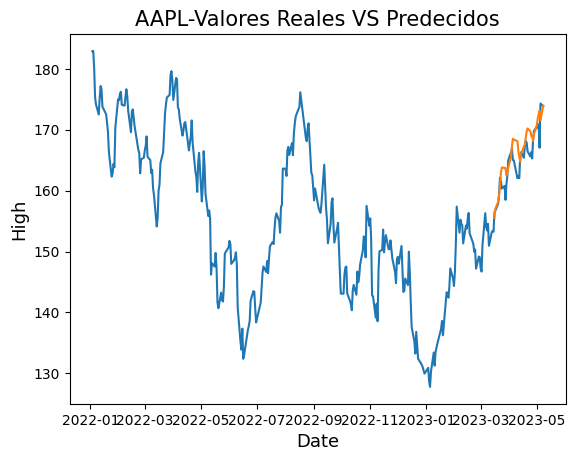

In [ ]:
plt.plot(df_AAPL['2022':].iloc[:,1:2])
plt.plot(df_AAPL.tail(len(prediccion)).index,prediccion)

plt.title("AAPL-Valores Reales VS Predecidos",fontsize=15)
plt.xlabel("Date",fontsize=13)
plt.ylabel("High",fontsize=13)
plt.show()

In [ ]:
error_mse = mean_squared_error(
                y_true = df_AAPL.tail(len(prediccion)).iloc[:,1:2],
                y_pred = prediccion
            )

print(f"Error de test (mse): {error_mse}")

Error de test (mse): 6.922624513078846


Epoch 1/20
330/330 [==============================] - 9s 23ms/step - loss: 0.0024
Epoch 2/20
330/330 [==============================] - 8s 24ms/step - loss: 4.5979e-04
Epoch 3/20
330/330 [==============================] - 7s 21ms/step - loss: 3.3141e-04
Epoch 4/20
330/330 [==============================] - 7s 22ms/step - loss: 2.7078e-04
Epoch 5/20
330/330 [==============================] - 7s 21ms/step - loss: 2.3414e-04
Epoch 6/20
330/330 [==============================] - 7s 22ms/step - loss: 2.1642e-04
Epoch 7/20
330/330 [==============================] - 7s 23ms/step - loss: 1.8816e-04
Epoch 8/20
330/330 [==============================] - 7s 20ms/step - loss: 1.7565e-04
Epoch 9/20
330/330 [==============================] - 7s 23ms/step - loss: 1.6282e-04
Epoch 10/20
330/330 [==============================] - 7s 20ms/step - loss: 1.5324e-04
Epoch 11/20
330/330 [==============================] - 7s 22ms/step - loss: 1.4420e-04
Epoch 12/20
330/330 [==============================] - 7

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



2/2 [==============================] - 0s 9ms/step


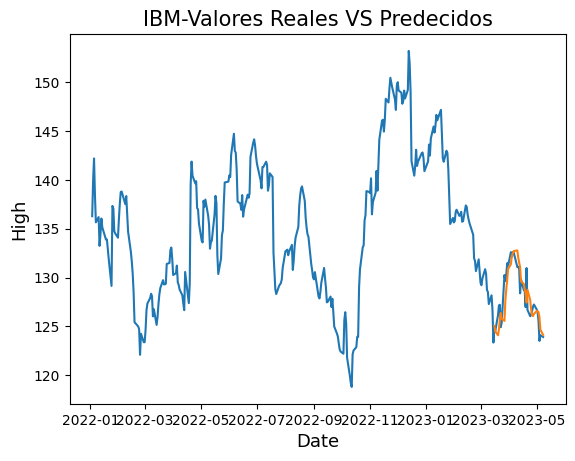

Error de test (mse): 2.442461826127588


In [ ]:
df_IBM = pd.read_csv('/content/sample_data/IBM.csv', index_col='Date', parse_dates=['Date'])
df_IBM.head()
set_entrenamiento = df_IBM[:'2022'].iloc[:,1:2]
set_validacion = df_IBM['2023':].iloc[:,1:2]
sc = MinMaxScaler(feature_range=(0,1))
set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)
time_step = 50
X_train = []
Y_train = []
m = len(set_entrenamiento_escalado)

for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0])

    # Y: el siguiente dato
    Y_train.append(set_entrenamiento_escalado[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
dim_entrada = (X_train.shape[1],1)
dim_salida = 1
na = 75
modelo = Sequential()
modelo.add(LSTM(units=na, input_shape=dim_entrada))
modelo.add(Dense(units=dim_salida))
modelo.compile(optimizer='rmsprop', loss='mse')
modelo.fit(X_train,Y_train,epochs=20,batch_size=32)
x_test = set_validacion.values
x_test = sc.transform(x_test)
X_test = []
for i in range(time_step,len(x_test)):
  X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
prediccion = modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)
plt.plot(df_IBM['2022':].iloc[:,1:2])
plt.plot(df_IBM.tail(len(prediccion)).index,prediccion)

plt.title("IBM-Valores Reales VS Predecidos",fontsize=15)
plt.xlabel("Date",fontsize=13)
plt.ylabel("High",fontsize=13)
plt.show()
error_mse = mean_squared_error(
                y_true = df_IBM.tail(len(prediccion)).iloc[:,1:2],
                y_pred = prediccion
            )

print(f"Error de test (mse): {error_mse}")